In [200]:
import pandas as pd
from sklearn import preprocessing
from pathlib import Path
import FLUCCOplus.config as config

p = config.DATA_PROCESSED / Path("peexcel_profile_jan_2022.csv")
df = pd.read_csv(p, encoding="cp850")


In [201]:
df.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020
0,0.853350,0.065328,0.228967,2.016161,0.0,0.0,92.799,914.630,245,1891
1,0.857153,0.069790,0.152220,2.000837,0.0,0.0,86.097,832.387,188,1969
2,0.860945,0.064174,0.109599,1.965811,0.0,0.0,72.062,926.463,139,1985
3,0.888022,0.064889,0.055622,2.646621,0.0,0.0,73.376,691.546,115,1852
4,0.859141,0.063968,0.039038,3.246434,0.0,0.0,68.995,453.314,163,1709


In [202]:
def normalize(dataframe, columns=None):
    """
    :return dataframe (normalized):
    """
    df = dataframe

    if columns is None:
        columns = df.columns

    x = df[columns].values  # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    ndf = pd.DataFrame(x_scaled, columns=df[columns].columns, index=df.index)
    return ndf

In [203]:
df = normalize(df)

In [204]:
import numpy as np
dates = np.arange("2019-01-01","2020-01-01 00:00", dtype="datetime64[h]")
df.index = dates
df.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020
2019-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.0,0.0,0.034815,0.313971,0.081336,0.636425
2019-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.0,0.0,0.032298,0.285723,0.062099,0.662732
2019-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.0,0.0,0.027026,0.318035,0.045562,0.668128
2019-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.0,0.0,0.027519,0.237349,0.037462,0.623272
2019-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.0,0.0,0.025874,0.155524,0.053662,0.575042


<AxesSubplot:>

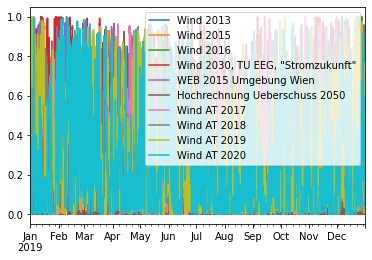

In [205]:
df.plot()

In [206]:
manutz = ["MANutz/Schaltsignal_REF.csv",
"MANutz/Schaltsignal_REG.csv",
"MANutz/Schaltsignal_uba30.csv",
"MANutz/Schaltsignal_uba50.csv",
"MANutz/Schaltsignal_veigl30.csv",
"MANutz/Schaltsignal_veigl50.csv" ]

df_nutz = pd.DataFrame()
for p in manutz:
    p = config.DATA_PROCESSED / Path(p)
    a = pd.read_csv(p).iloc[:,1]
    df_nutz[str(p).split("_")[1][:-4]] = a
df_nutz.index = dates
df_nutz.head()
df_nutz = df_nutz.replace(1,-1)
df_nutz = df_nutz.replace(0,1).replace(-1,0)


In [207]:
p = config.DATA_PROCESSED / Path("DrexelCO2/Signale_CO2mix_SpotMarket.xlsx")
df_drexelco2 = pd.read_excel(p, index_col=(0))
df_drexelco2.index = dates
df_drexelco2

,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0
2019-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0
2019-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0
2019-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0


In [208]:
df=pd.concat([df, df_nutz], axis=1)
df.head()


,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,REF,REG,uba30,uba50,veigl30,veigl50
2019-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.0,0.0,0.034815,0.313971,0.081336,0.636425,1.0,1.0,1.0,1.0,1.0,1.0
2019-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.0,0.0,0.032298,0.285723,0.062099,0.662732,1.0,1.0,1.0,1.0,1.0,1.0
2019-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.0,0.0,0.027026,0.318035,0.045562,0.668128,1.0,1.0,1.0,1.0,1.0,1.0
2019-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.0,0.0,0.027519,0.237349,0.037462,0.623272,1.0,1.0,1.0,1.0,1.0,1.0
2019-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.0,0.0,0.025874,0.155524,0.053662,0.575042,0.0,0.0,0.0,0.0,0.0,1.0


Freigabesignal wenn > x% der Nennleistung

In [209]:
import os
#TODO: into data
if not os.path.exists("..\data\Plots"):
        os.makedirs("..\data\Plots")

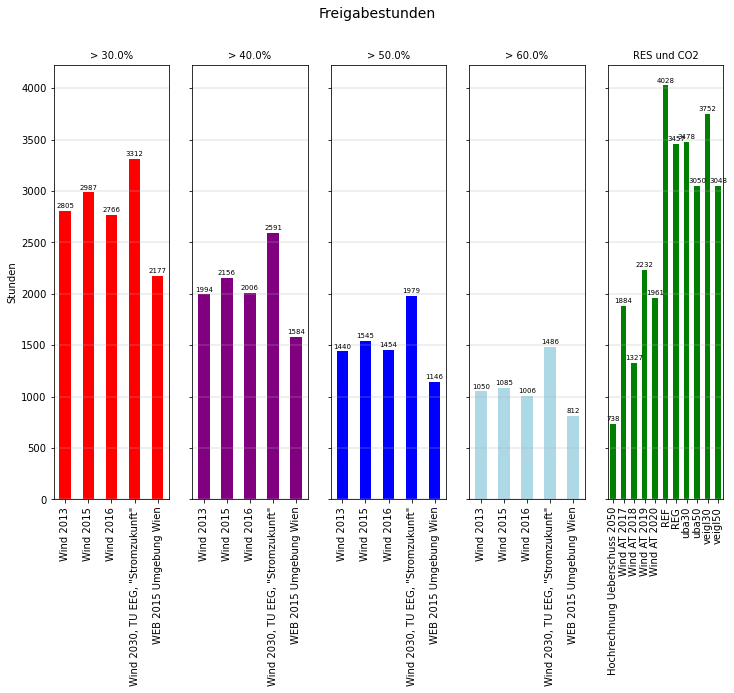

In [210]:
import matplotlib.pyplot as plt

cutoffs = [0.3,0.4,0.5,0.6]
colors=["red","purple","blue", "lightblue"]
anzahl = pd.DataFrame()
c1 = df.columns[:-11]
c2 = df.columns[-11:]
fig, ax = plt.subplots(1, len(cutoffs)+1, sharey=True, figsize=(12,8))
for i, x in enumerate(cutoffs):
    sig = df[c1].where(df>x)
    sig.count().plot(kind="bar", ylabel="Stunden", ax=ax[i], title=f"> {x*100}%", color=colors[i])
    for p in ax[i].patches:
      ax[i].annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=7, color='black', xytext=(0, 5), textcoords='offset points')
    ax[i].grid(axis="y", linewidth=0.4)
sig = df[c2].where(df>0.5)
sig.count().plot(kind="bar", ax=ax[len(cutoffs)], title="RES und CO2", color="green")
for t in ax[4].patches:
    ax[4].annotate("{:.0f}" .format(t.get_height()), (t.get_x() + t.get_width() / 2., t.get_height()), ha='center', va='center', fontsize=7, color='black', xytext=(0, 5), textcoords='offset points')
    ax[4].grid(axis="y", linewidth=0.4)
fig.suptitle('Freigabestunden', fontsize=14)
fig.savefig("../data/Plots/freigabestunden_1.png", dpi=300, bbox_inches="tight")

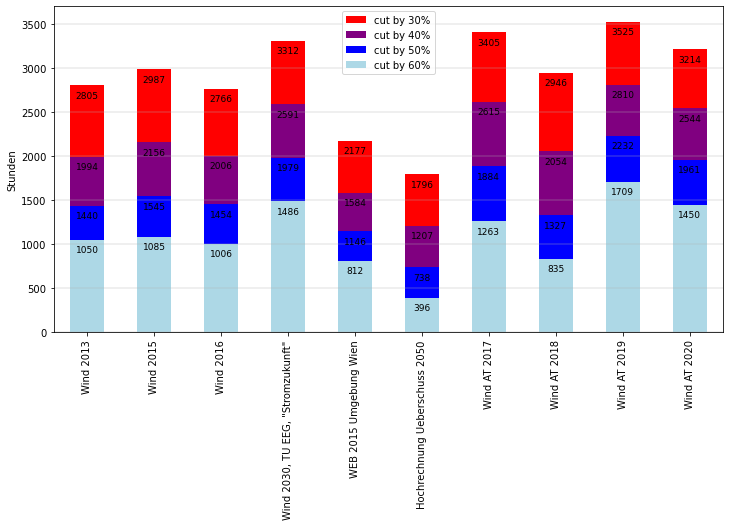

In [211]:

anzahl = pd.DataFrame()
c1 = df.columns[:-6]
fig, ax = plt.subplots(1, figsize=(12,6))
sig30 = df[c1].where(df>0.3)
sig40 = df[c1].where(df>0.4)
sig50 = df[c1].where(df>0.5)
sig60 = df[c1].where(df>0.6)

sig30.count().plot(kind="bar", ax=ax, color="red", ylabel="Stunden", label="cut by 30%")
sig40.count().plot( kind="bar", ax=ax, color="purple", label="cut by 40%")
sig50.count().plot(kind="bar", ax=ax, color="blue", label="cut by 50%")
sig60.count().plot(kind="bar", ax=ax, color="lightblue", label="cut by 60%")
for p in ax.patches:
      ax.annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, -10), textcoords='offset points')
ax.grid(axis="y", linewidth=0.4)
plt.legend()
fig.savefig("../data/Plots/freigabestunden_overlapped.png", dpi=300, bbox_inches="tight")

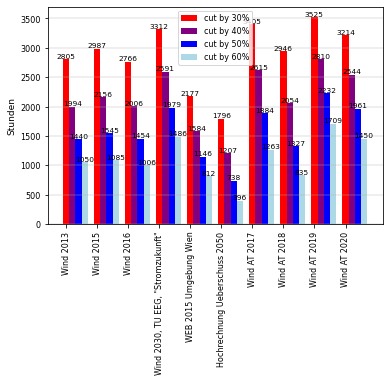

In [212]:
x = np.arange(10)

width = 0.20
text_size = 9
plt.rc('font', size=text_size-1)          # controls default text sizes
plt.rc('axes', titlesize=text_size)     # fontsize of the axes title
plt.rc('axes', labelsize=text_size)
bar1 = plt.bar(x, sig30.count(), width, color="red", label="cut by 30%")
bar2 = plt.bar(x+0.2, sig40.count(), width, color="purple", label="cut by 40%")
bar3 = plt.bar(x+0.4, sig50.count(), width, color="blue", label="cut by 50%")
bar4 = plt.bar(x+0.6, sig60.count(), width, color="lightblue", label="cut by 60%")
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom', fontsize=7.5, color='black')

plt.grid(axis="y", linewidth=0.4)
plt.xticks(x, sig30.columns)
plt.ylabel('Stunden')
plt.xticks(rotation=90)
plt.legend()
plt.savefig("../data/Plots/freigabestunden_gruppiert.png", dpi=300, bbox_inches="tight")

In [213]:
import seaborn as sns
#anzahl
#sns.relplot(data=anzahl)

In [214]:
df=pd.concat([df, df_drexelco2], axis=1)
df.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2019-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.0,0.0,0.034815,0.313971,0.081336,0.636425,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.0,0.0,0.032298,0.285723,0.062099,0.662732,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.0,0.0,0.027026,0.318035,0.045562,0.668128,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.0,0.0,0.027519,0.237349,0.037462,0.623272,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.0,0.0,0.025874,0.155524,0.053662,0.575042,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [215]:
df.columns

Index(['Wind 2013', 'Wind 2015', 'Wind 2016',
       'Wind 2030, TU EEG, "Stromzukunft"', 'WEB 2015 Umgebung Wien',
       'Hochrechnung Ueberschuss 2050', 'Wind AT 2017', 'Wind AT 2018',
       'Wind AT 2019', 'Wind AT 2020', 'REF', 'REG', 'uba30', 'uba50',
       'veigl30', 'veigl50', '1.5WP-3K-PV/Battery-CO2',
       '1.3WP-3K-PV/Battery-CO2', '1.3WP-3K-keine PV/Battery-CO2/Preis',
       '1.3WP-3K-PV/Battery-CO2/Preis', '1.3WP-3K-PV/Battery-Preis'],
      dtype='object')

In [216]:
cut = 0.4
df_sign = pd.DataFrame()
for c in df.columns:
    df_sign[c] = df[c].map(lambda x: -1 if x < cut else 1)

In [217]:
df_sign

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2019-01-01 00:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-01-01 01:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-01-01 02:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-01-01 03:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-01-01 04:00:00,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-12-31 20:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-12-31 21:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-12-31 22:00:00,1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1


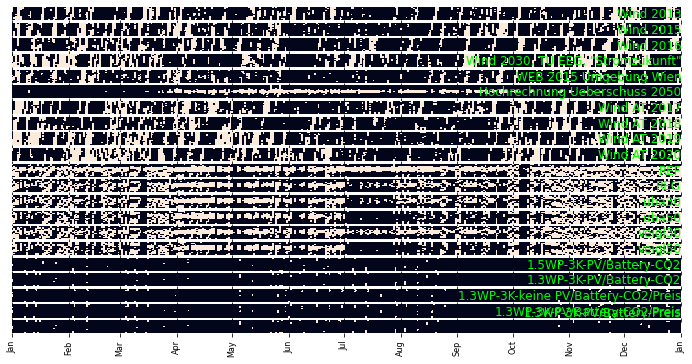

In [218]:
from matplotlib.dates import MonthLocator
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(len(df_sign.columns), 1, sharex=True, sharey=True, figsize=(12,6))
for i, col in enumerate(df_sign.columns):
    vis = pd.pivot_table(df_sign,
                         index=df_sign.index.date, columns=df_sign.index.hour, values=col)
    sns.heatmap(vis.T,
                cbar=False,
                yticklabels=False,
                ax=ax[i])
    ax[i].set_title(col, loc="right", color="lime", fontsize=12, pad=-11)
    months = MonthLocator()
    monthsFmt = DateFormatter("%b")
    ax[i].xaxis.set_major_locator(months)
    ax[i].xaxis.set_major_formatter(monthsFmt)

In [219]:
fig.savefig(f"../data/Plots/heatmap_{cut}_2019.png", dpi=300)

In [220]:
df_sign

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2019-01-01 00:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-01-01 01:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-01-01 02:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-01-01 03:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-01-01 04:00:00,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-12-31 20:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-12-31 21:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-12-31 22:00:00,1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1


In [221]:
df_step = pd.DataFrame()
df_not = pd.DataFrame()

#fig, ax = plt.subplots()
for c in df_sign.columns:
    df_step[c] =  df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==1).cumsum()
    df_not[c] =  df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==-1).cumsum()

In [222]:
df_step.iloc[0,:] = 0
df_step

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,...,666.0,667.0,565.0,718.0,538.0,NaN,NaN,NaN,NaN,NaN
2019-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,...,666.0,667.0,565.0,718.0,538.0,NaN,NaN,NaN,NaN,NaN
2019-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,...,666.0,667.0,565.0,718.0,538.0,NaN,NaN,NaN,NaN,NaN
2019-12-31 22:00:00,187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,...,666.0,667.0,565.0,718.0,538.0,NaN,NaN,NaN,NaN,NaN


In [223]:
df

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2019-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.000000,0.0,0.034815,0.313971,0.081336,0.636425,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.000000,0.0,0.032298,0.285723,0.062099,0.662732,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.000000,0.0,0.027026,0.318035,0.045562,0.668128,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.000000,0.0,0.027519,0.237349,0.037462,0.623272,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.000000,0.0,0.025874,0.155524,0.053662,0.575042,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.314554,0.396654,0.071725,0.204918,0.066582,0.0,0.158621,0.244374,0.673304,0.086003,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 20:00:00,0.358647,0.336054,0.070473,0.215738,0.052745,0.0,0.218883,0.187702,0.606142,0.098482,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 21:00:00,0.390740,0.275863,0.069313,0.225246,0.026788,0.0,0.236357,0.174650,0.659129,0.141990,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 22:00:00,0.420899,0.192397,0.093453,0.235082,0.002470,0.0,0.266760,0.145799,0.683091,0.138954,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [224]:
df_step_wind = pd.DataFrame()
df_step_wind = df_step.filter(["Wind 2013", "Wind 2015", "Wind 2016", "Wind AT 2017", "Wind AT 2018", "Wind AT 2019", "Wind AT 2020"], axis=1)

df_step_R = pd.DataFrame()
df_step_R = df_step.filter([df_step.columns[3], "WEB 2015 Umgebung Wien", "Hochrechnung Ueberschuss 2050"], axis=1)
#df_step_R

df_step_Max = pd.DataFrame()
df_step_Max = df_step.filter(["REF", "REG", "uba30", "uba50", "veigl30", "veigl50"], axis=1)
df_step_Drexel = df_step.filter(["1.5WP-3K-PV/Battery-CO2", "1.3WP-3K-PV/Battery-CO2", "1.3WP-3K-keine PV/Battery-CO2/Preis", "1.3WP-3K-PV/Battery-CO2/Preis", "1.3WP-3K-PV/Battery-Preis"], axis=1)

In [225]:
df_step_Drexel

,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN
2019-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN
2019-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN
2019-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN


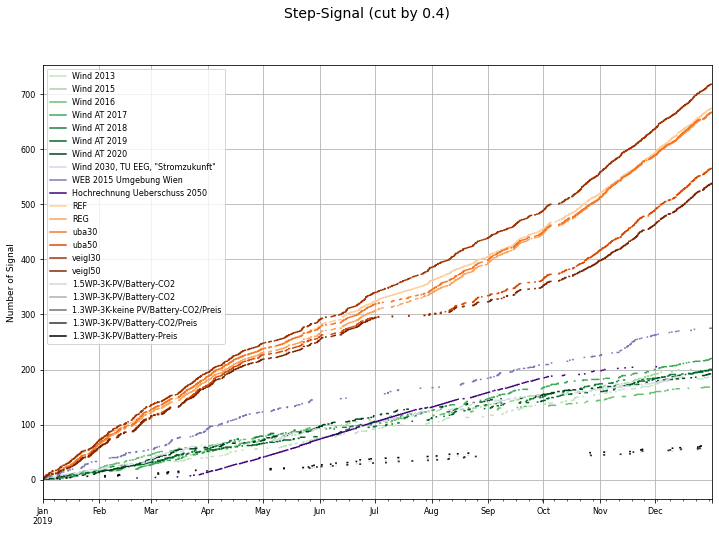

In [226]:
import matplotlib as mpl
from matplotlib import cm
from matplotlib import colors

cmapgreen = mpl.cm.colors
cmapgreen = mpl.cm.Greens(np.linspace(0,1,20))
cmapgreen = mpl.colors.ListedColormap(cmapgreen[5:,:-1])

cmapblue = mpl.cm.colors
cmapblue = mpl.cm.Blues(np.linspace(0,1,20))
cmapblue = mpl.colors.ListedColormap(cmapblue[5:,:-1])

cmaporange = mpl.cm.colors
cmaporange = mpl.cm.Oranges(np.linspace(0,1,20))
cmaporange = mpl.colors.ListedColormap(cmaporange[5:,:-1])

cmappurple = mpl.cm.colors
cmappurple = mpl.cm.Purples(np.linspace(0,1,20))
cmappurple = mpl.colors.ListedColormap(cmappurple[5:,:-1])

cmapgrey = mpl.cm.colors
cmapgrey = mpl.cm.Greys(np.linspace(0,1,20))
cmapgrey = mpl.colors.ListedColormap(cmapgrey[5:,:-1])

fig, ax = plt.subplots()

df_step_wind[df_step_wind.columns[0:7]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmapgreen, grid=True, ax=ax)
df_step[df_step.columns[3:6]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmappurple, grid=True, ax=ax)
df_step[df_step.columns[10:16]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmaporange, grid=True, ax=ax)
df_step[df_step.columns[-5:]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmapgrey, grid=True, ax=ax)
fig.suptitle('Step-Signal (cut by {})' .format(cut), fontsize=14)
fig.savefig("../data/Plots/cumplot_color_{}.png" .format(cut), dpi=300)

In [227]:
df_step.fillna(0, inplace=True)
df_not.fillna(0, inplace=True)

In [228]:
desc = pd.DataFrame()
desc["Zeitraum mit Signal [h]"] = df_sign.where(df_sign>0).sum()
desc["Nicht-Signal-Zeitraum [h]"] = 8760 - desc["Zeitraum mit Signal [h]"]
desc["Anzahl Signal-Perioden"] = df_step.max()
desc["Durchschnittliche Dauer Signal [h]"] = (desc["Zeitraum mit Signal [h]"]/desc["Anzahl Signal-Perioden"])
desc["Durchschnittliche Dauer Nicht-Signal [h]"] = desc["Nicht-Signal-Zeitraum [h]"]/desc["Anzahl Signal-Perioden"]

desc

,Zeitraum mit Signal [h],Nicht-Signal-Zeitraum [h],Anzahl Signal-Perioden,Durchschnittliche Dauer Signal [h],Durchschnittliche Dauer Nicht-Signal [h]
Wind 2013,1994.0,6766.0,187.0,10.663102,36.181818
Wind 2015,2156.0,6604.0,201.0,10.726368,32.855721
Wind 2016,2006.0,6754.0,168.0,11.940476,40.202381
"Wind 2030, TU EEG, ""Stromzukunft""",2591.0,6169.0,188.0,13.781915,32.813830
WEB 2015 Umgebung Wien,1584.0,7176.0,275.0,5.760000,26.094545
Hochrechnung Ueberschuss 2050,1207.0,7553.0,205.0,5.887805,36.843902
Wind AT 2017,2615.0,6145.0,220.0,11.886364,27.931818
Wind AT 2018,2054.0,6706.0,200.0,10.270000,33.530000
Wind AT 2019,2810.0,5950.0,199.0,14.120603,29.899497
Wind AT 2020,2545.0,6215.0,192.0,13.255208,32.369792


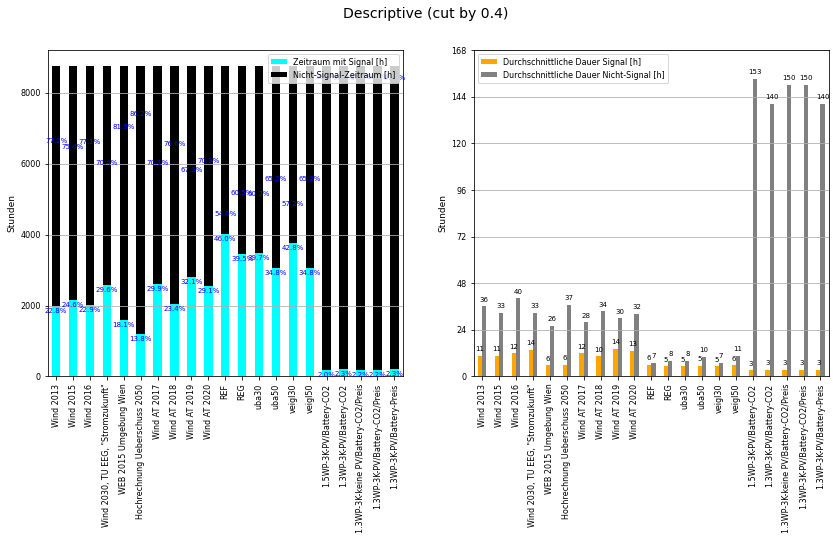

In [229]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
desc[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
    .plot(kind="bar",color=["cyan", "black"], stacked=True, ax = ax[0])
ax[0].set_ylabel("Stunden")
#desc["Anzahl Signal-Perioden"].plot(kind="bar",color=["cyan"], stacked=True, ax = ax[1])
#ax[1].set_ylabel("Anzahl Signal-Perioden")
desc[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
    .plot(kind="bar",color=["orange", "grey"], stacked=False, ax = ax[1])
for p in ax[0].patches:
      ax[0].annotate("{:.1f}%" .format(p.get_height()*100/8760), (p.get_x() + p.get_width() / 2., p.get_height()+5), ha='center', va='center', fontsize=7, color='blue', xytext=(0, -5),
                     textcoords='offset points')
for p in ax[1].patches:
      ax[1].annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()+5), ha='center', va='center', fontsize=7, color='black', xytext=(0, -3),
                     textcoords='offset points')
ax[1].set_ylabel("Stunden")
ax[1].yaxis.set_ticks(np.arange(0, 169, 24))
ax[0].grid(axis='y')
ax[1].grid(axis='y')
fig.suptitle('Descriptive (cut by {})' .format(cut), fontsize=14)
fig.savefig("../data/Plots/descriptive_{}.png" .format(cut), dpi=300, bbox_inches='tight')

In [230]:
df_step.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [231]:
len(desc["Durchschnittliche Dauer Signal [h]"])

21

In [232]:
df

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2019-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.000000,0.0,0.034815,0.313971,0.081336,0.636425,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.000000,0.0,0.032298,0.285723,0.062099,0.662732,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.000000,0.0,0.027026,0.318035,0.045562,0.668128,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.000000,0.0,0.027519,0.237349,0.037462,0.623272,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.000000,0.0,0.025874,0.155524,0.053662,0.575042,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.314554,0.396654,0.071725,0.204918,0.066582,0.0,0.158621,0.244374,0.673304,0.086003,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 20:00:00,0.358647,0.336054,0.070473,0.215738,0.052745,0.0,0.218883,0.187702,0.606142,0.098482,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 21:00:00,0.390740,0.275863,0.069313,0.225246,0.026788,0.0,0.236357,0.174650,0.659129,0.141990,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 22:00:00,0.420899,0.192397,0.093453,0.235082,0.002470,0.0,0.266760,0.145799,0.683091,0.138954,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


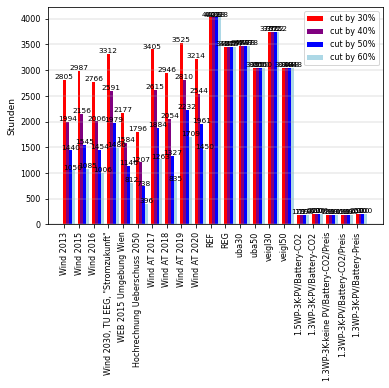

In [233]:
x = np.arange(21)

width = 0.20
#desc[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]
bar1 = plt.bar(x, df.where(df>0.3).count(), width, color="red", label="cut by 30%")
bar2 = plt.bar(x+0.2, df.where(df>0.4).count(), width, color="purple", label="cut by 40%")
bar3 = plt.bar(x+0.4, df.where(df>0.5).count(), width, color="blue", label="cut by 50%")
bar4 = plt.bar(x+0.6, df.where(df>0.6).count(), width, color="lightblue", label="cut by 60%")
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom', fontsize=7.5, color='black')

plt.grid(axis="y", linewidth=0.4)
plt.xticks(x, df_sign.columns)
plt.ylabel('Stunden')
plt.xticks(rotation=90)
plt.legend()
plt.savefig("../data/Plots/freigabestunden_gruppiert_2.png", dpi=300, bbox_inches="tight")

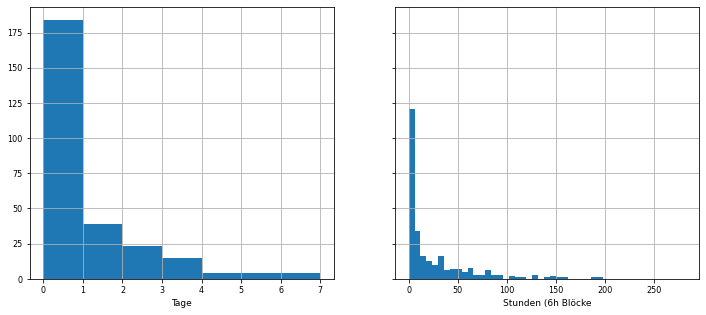

In [234]:
daily = df_not["WEB 2015 Umgebung Wien"].value_counts().sort_index()/24
hourly = df_not["WEB 2015 Umgebung Wien"].value_counts().sort_index()

hours = [6*i for i in range(8*6)]
days = range(8)
fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)
daily.hist(bins=days, ax = ax[0])
hourly.hist(bins=hours, ax=ax[1])
ax[0].set_xlabel("Tage")
ax[1].set_xlabel("Stunden (6h Blöcke")
fig.set_label("Signals shorter than x days")

In [235]:
df_not

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2019-01-01 00:00:00,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2019-01-01 01:00:00,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2019-01-01 02:00:00,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2019-01-01 03:00:00,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2019-01-01 04:00:00,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,186.0,202.0,169.0,189.0,276.0,206.0,221.0,201.0,0.0,192.0,...,0.0,0.0,0.0,0.0,0.0,57.0,62.0,58.0,58.0,62.0
2019-12-31 20:00:00,186.0,202.0,169.0,189.0,276.0,206.0,221.0,201.0,0.0,192.0,...,0.0,0.0,0.0,0.0,0.0,57.0,62.0,58.0,58.0,62.0
2019-12-31 21:00:00,186.0,202.0,169.0,189.0,276.0,206.0,221.0,201.0,0.0,192.0,...,0.0,0.0,0.0,0.0,0.0,57.0,62.0,58.0,58.0,62.0
2019-12-31 22:00:00,0.0,202.0,169.0,189.0,276.0,206.0,221.0,201.0,0.0,192.0,...,0.0,0.0,0.0,0.0,0.0,57.0,62.0,58.0,58.0,62.0


In [236]:
df_hourly_not = pd.DataFrame()
for c in df_not.columns:
    df_hourly_not[c]=(df_not[c]).value_counts(sort=True)
df_hourly_not.sort_index()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
0.0,1994,2156,2006.0,2591,1584,1207,2615,2054,2810,2545,...,3457,3478,3050,3752,3048,179.0,200.0,190.0,190.0,200.0
1.0,33,41,69.0,4,10,226,42,32,13,75,...,4,4,3,4,1,12.0,12.0,6.0,6.0,12.0
2.0,15,16,179.0,2,3,694,24,6,4,3,...,4,4,3,3,5,174.0,173.0,3.0,3.0,173.0
3.0,2,73,1.0,10,16,309,30,111,37,47,...,5,5,1,5,2,115.0,115.0,175.0,175.0,115.0
4.0,11,2,6.0,14,4,237,13,126,2,79,...,5,5,4,5,4,99.0,43.0,114.0,114.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182.0,329,18,NaN,3,55,18,63,227,2,51,...,5,1,1,7,15,NaN,NaN,NaN,NaN,NaN
183.0,6,21,NaN,9,60,18,61,48,1,56,...,4,4,5,1,29,NaN,NaN,NaN,NaN,NaN
184.0,17,2,NaN,10,26,45,26,24,23,84,...,3,4,1,2,3,NaN,NaN,NaN,NaN,NaN
185.0,19,57,NaN,35,31,22,124,27,9,57,...,2,3,2,7,3,NaN,NaN,NaN,NaN,NaN


In [237]:
#fig, ax = plt.subplots()
# df_hourly_not.hist(bins=hours, alpha=0.8, sharey=True, sharex=True, figsize=(12,6))
#fig.savefig("hists.png", dpi=300)

Text(0.5, 0, 'Nicht-Signale kürzer als (6h Blöcke)')

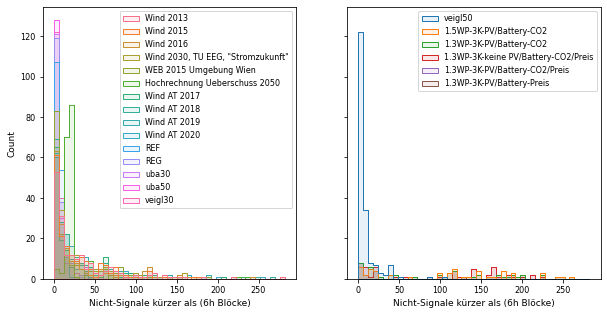

In [238]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
c1 = df_hourly_not.columns[:-6]
c2 = df_hourly_not.columns[-6:]

sns.histplot(df_hourly_not[c1], kde=False,alpha=0.1,linewidth=1,
             fill=True,
             cumulative=False,
             element="step",
             bins=hours, ax=ax[0])
sns.histplot(df_hourly_not[c2], kde=False,alpha=0.1,linewidth=1,
             fill=True,
             cumulative=False,
             element="step",
             bins=hours, ax=ax[1])

ax[0].set_xlabel("Nicht-Signale kürzer als (6h Blöcke)")
ax[1].set_xlabel("Nicht-Signale kürzer als (6h Blöcke)")
#fig.savefig("all_hists_50.png", dpi=300)

doku daziu:
https://seaborn.pydata.org/generated/seaborn.histplot.html

In [239]:
df = normalize(df)
peexcel_path = config.DATA_PROCESSED / Path("peexcel_normalized.csv")
df.to_csv(peexcel_path)

In [240]:
p = config.DATA_PROCESSED / Path("WEB_normalized.csv")
df_web = pd.read_csv(p, delimiter=";", parse_dates=True, index_col=0, decimal=".", encoding="cp850")
df_EA = df_web[df_web.index.year == 2019]
df_EA

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III
Datetime UCT,,,,,,
2019-01-01 00:00:00,0.002083,0.009175,0.225000,0.000000,0.000000,0.000000
2019-01-01 01:00:00,0.000000,0.000000,0.113143,0.000000,0.000000,0.000000
2019-01-01 02:00:00,0.000000,0.000000,0.084000,0.000000,0.000000,0.000000
2019-01-01 03:00:00,0.000000,0.000000,0.061071,0.000000,0.000000,0.000000
2019-01-01 04:00:00,0.000000,0.003236,0.045429,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2019-12-31 19:00:00,0.212083,0.161961,0.956786,0.045937,0.049813,0.038062
2019-12-31 20:00:00,0.231667,0.261251,0.964714,0.003000,0.005219,0.002063
2019-12-31 21:00:00,0.331667,0.307005,0.885643,0.000000,0.000000,0.000000


In [241]:

#dates = np.arange("2020-01-01", "2021-01-01 00:00", dtype="datetime64[h]")
df_pee = pd.read_csv(peexcel_path, index_col=0)
df_pee.index = dates
df_EA = pd.concat([df_EA, df_pee[["WEB 2015 Umgebung Wien", "Wind AT 2019"]]], axis=1)
df_EA

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III,WEB 2015 Umgebung Wien,Wind AT 2019
2019-01-01 00:00:00,0.002083,0.009175,0.225000,0.000000,0.000000,0.000000,0.000000,0.081336
2019-01-01 01:00:00,0.000000,0.000000,0.113143,0.000000,0.000000,0.000000,0.000000,0.062099
2019-01-01 02:00:00,0.000000,0.000000,0.084000,0.000000,0.000000,0.000000,0.000000,0.045562
2019-01-01 03:00:00,0.000000,0.000000,0.061071,0.000000,0.000000,0.000000,0.000000,0.037462
2019-01-01 04:00:00,0.000000,0.003236,0.045429,0.000000,0.000000,0.000000,0.000000,0.053662
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.212083,0.161961,0.956786,0.045937,0.049813,0.038062,0.066582,0.673304
2019-12-31 20:00:00,0.231667,0.261251,0.964714,0.003000,0.005219,0.002063,0.052745,0.606142
2019-12-31 21:00:00,0.331667,0.307005,0.885643,0.000000,0.000000,0.000000,0.026788,0.659129
2019-12-31 22:00:00,0.399792,0.596027,0.764571,0.000000,0.000000,0.000000,0.002470,0.683091


Text(0.5, 0.98, 'Freigabesignal WEB (2019)')

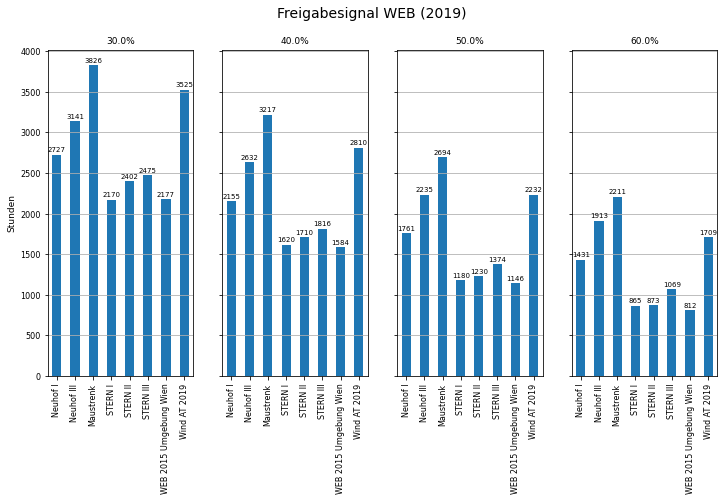

In [242]:
cutoffs = [0.3, 0.4, 0.5, 0.6]
anzahl_EA = pd.DataFrame()

fig, ax = plt.subplots(1, len(cutoffs), sharey=True, figsize=(12,6))
for i, x in enumerate(cutoffs):
    sig = df_EA.where(df_EA > x)
    sig.count().plot(kind="bar", ax=ax[i], title=f"{x*100}%")
    anzahl_EA[x] = sig.count()
    ax[i].grid(axis='y')
    ax[i].set_ylabel("Stunden")
    for p in ax[i].patches:
      ax[i].annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=7, color='black', xytext=(0, 5), textcoords='offset points')


fig.suptitle('Freigabesignal WEB (2019)', fontsize=14)
#fig.savefig("../data/Plots/Freigabe-threshold_WEB_2019.png", dpi=300, bbox_inches="tight")

In [243]:
df_EA > 0.5

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III,WEB 2015 Umgebung Wien,Wind AT 2019
2019-01-01 00:00:00,False,False,False,False,False,False,False,False
2019-01-01 01:00:00,False,False,False,False,False,False,False,False
2019-01-01 02:00:00,False,False,False,False,False,False,False,False
2019-01-01 03:00:00,False,False,False,False,False,False,False,False
2019-01-01 04:00:00,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,False,False,True,False,False,False,False,True
2019-12-31 20:00:00,False,False,True,False,False,False,False,True
2019-12-31 21:00:00,False,False,True,False,False,False,False,True
2019-12-31 22:00:00,False,True,True,False,False,False,False,True


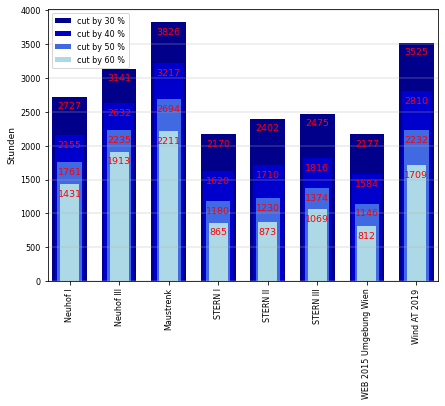

In [244]:
cutoffs = [0.3, 0.4, 0.5, 0.6]
anzahl_EA = pd.DataFrame()
fig, ax = plt.subplots(1, figsize=(7,5))
#for i, x in enumerate(cutoffs):
sig_30 = df_EA.where(df_EA > 0.3)
sig_40 = df_EA.where(df_EA > 0.4)
sig_50 = df_EA.where(df_EA > 0.5)
sig_60 = df_EA.where(df_EA > 0.6)
width = 0.7
sig_30.count().plot(kind="bar", ax=ax, width = width, color='darkblue', label='cut by 30 %')
sig_40.count().plot(kind="bar", ax=ax, width = width*0.85, color='mediumblue', label='cut by 40 %')
sig_50.count().plot(kind="bar", ax=ax, width = width*0.7, color='royalblue', label='cut by 50 %')
sig_60.count().plot(kind="bar", ax=ax, width = width*0.55, color='lightblue', label='cut by 60 %')
ax.grid(axis='y', linewidth="0.4")
anzahl_EA_30 = sig_30.count()
for p in ax.patches:
      ax.annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9.5, color='r', xytext=(0, -10), textcoords='offset points')
ax.set_ylabel("Stunden")

plt.legend()
plt.show()
fig.savefig("../data/Plots/freigabestunden_overlapped_web_2019.png", dpi=300, bbox_inches="tight")

In [245]:

df_sign_EA = pd.DataFrame()
for c in df_EA.columns:
    df_sign_EA[c] = df_EA[c].map(lambda x: -1 if x < cut else 1)
df_sign_EA

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III,WEB 2015 Umgebung Wien,Wind AT 2019
2019-01-01 00:00:00,-1,-1,-1,-1,-1,-1,-1,-1
2019-01-01 01:00:00,-1,-1,-1,-1,-1,-1,-1,-1
2019-01-01 02:00:00,-1,-1,-1,-1,-1,-1,-1,-1
2019-01-01 03:00:00,-1,-1,-1,-1,-1,-1,-1,-1
2019-01-01 04:00:00,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,-1,-1,1,-1,-1,-1,-1,1
2019-12-31 20:00:00,-1,-1,1,-1,-1,-1,-1,1
2019-12-31 21:00:00,-1,-1,1,-1,-1,-1,-1,1
2019-12-31 22:00:00,-1,1,1,-1,-1,-1,-1,1


In [246]:

df_step_EA = pd.DataFrame()
df_not_EA = pd.DataFrame()

for b in df_sign_EA.columns:
    df_step_EA[b] = df_sign_EA[b].shift(1).ne(df_sign_EA[b]).where(df_sign_EA[b] == 1).cumsum()
    df_not_EA[b] = df_sign_EA[b].shift(1).ne(df_sign_EA[b]).where(df_sign_EA[b] == -1).cumsum()

df_step_EA.iloc[0, :] = 0
df_step_EA

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III,WEB 2015 Umgebung Wien,Wind AT 2019
2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,NaN,NaN,393.0,NaN,NaN,NaN,NaN,199.0
2019-12-31 20:00:00,NaN,NaN,393.0,NaN,NaN,NaN,NaN,199.0
2019-12-31 21:00:00,NaN,NaN,393.0,NaN,NaN,NaN,NaN,199.0
2019-12-31 22:00:00,NaN,395.0,393.0,NaN,NaN,NaN,NaN,199.0


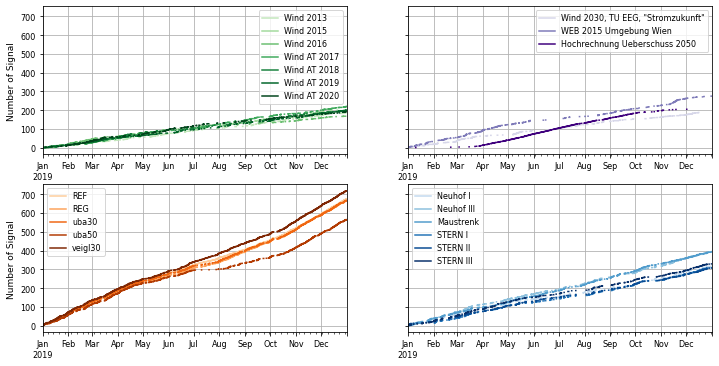

In [247]:
import matplotlib as mpl
from matplotlib import cm
from matplotlib import colors

fig, ax = plt.subplots(2, 2, sharey=True)

df_step_wind[df_step_wind.columns[0:7]].plot(figsize=(12,6), ylabel="Number of Signal", cmap=cmapgreen, grid=True, ax=ax[0,0])
df_step_R[df_step_R.columns[0:3]].plot(figsize=(12,6), ylabel="Number of Signal", cmap=cmappurple, grid=True, ax=ax[0,1])
df_step_Max[df_step_Max.columns[0:5]].plot(figsize=(12,6), ylabel="Number of Signal", cmap=cmaporange, grid=True, ax=ax[1, 0])
df_step_EA[df_step_EA.columns[0:6]].plot(figsize=(12, 6), ylabel="Number of Signal", cmap=cmapblue, grid=True, ax=ax[1, 1])

fig.savefig("../data/Plots/cumplot_all_{}_2019.png" .format(cut), dpi=300)

In [248]:
df_EA.where(df_EA>0.4)

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III,WEB 2015 Umgebung Wien,Wind AT 2019
2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,NaN,NaN,0.956786,NaN,NaN,NaN,NaN,0.673304
2019-12-31 20:00:00,NaN,NaN,0.964714,NaN,NaN,NaN,NaN,0.606142
2019-12-31 21:00:00,NaN,NaN,0.885643,NaN,NaN,NaN,NaN,0.659129
2019-12-31 22:00:00,NaN,0.596027,0.764571,NaN,NaN,NaN,NaN,0.683091


In [249]:
cuts = []
for i in range(30,61):
    cuts.append(i/100)
df_web15 = df_web[df_web.index.year == 2015]
sigEA15 = pd.DataFrame()
anzahlEA15 = pd.DataFrame()
df_web16 = df_web[df_web.index.year == 2016]
sigEA16 = pd.DataFrame()
anzahlEA16 = pd.DataFrame()
df_web17 = df_web[df_web.index.year == 2017]
sigEA17 = pd.DataFrame()
anzahlEA17 = pd.DataFrame()
df_web18 = df_web[df_web.index.year == 2018]
sigEA18 = pd.DataFrame()
anzahlEA18 = pd.DataFrame()
df_web19 = df_web[df_web.index.year == 2019]
sigEA19 = pd.DataFrame()
anzahlEA19 = pd.DataFrame()
sigdf = pd.DataFrame()
anzahldf = pd.DataFrame()
#fig, ax = plt.subplots(1, len(cuts), figsize=(16,7))
for i, x in enumerate(cuts):
    sigEA15 = df_web15.where(df_web15>x)
    anzahlEA15[x] = sigEA15.count()
    sigEA16 = df_web16.where(df_web16>x)
    anzahlEA16[x] = sigEA16.count()
    sigEA17 = df_web17.where(df_web17>x)
    anzahlEA17[x] = sigEA17.count()
    sigEA18 = df_web18.where(df_web18>x)
    anzahlEA18[x] = sigEA18.count()
    sigEA19 = df_web19.where(df_web19>x)
    anzahlEA19[x] = sigEA19.count()
    sigdf = df.where(df>x)
    anzahldf[x] = sigdf.count()

In [250]:
anzahlEA17

,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60
Neuhof I,2931,2857,2775,2699,2638,2566,2498,2442,2379,2307,...,1685,1632,1577,1544,1498,1461,1411,1368,1336,1310
Neuhof III,3487,3412,3356,3299,3233,3168,3109,3046,2988,2935,...,2328,2290,2247,2207,2162,2130,2078,2033,1992,1954
Maustrenk,3859,3777,3698,3638,3575,3513,3446,3374,3316,3257,...,2562,2504,2453,2395,2331,2278,2217,2178,2125,2069
STERN I,2439,2382,2329,2273,2217,2157,2089,2040,1991,1943,...,1384,1345,1312,1273,1232,1213,1181,1156,1114,1072
STERN II,2511,2452,2381,2309,2241,2169,2112,2057,1992,1934,...,1274,1231,1194,1144,1096,1059,1023,988,961,940
STERN III,2846,2781,2728,2657,2594,2537,2468,2423,2364,2311,...,1710,1666,1622,1575,1534,1493,1456,1420,1377,1336


In [251]:
anzahl_EA_Wind = pd.concat([anzahlEA[0:6], anzahldf[0:3], anzahldf[6:10]], axis=0)


In [252]:
anzahldf.T

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
0.30,2805,2987,2766,3312,2177,1796,3405,2946,3525,3214,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.31,2704,2884,2680,3223,2119,1726,3309,2843,3432,3149,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.32,2614,2794,2579,3141,2059,1648,3238,2762,3358,3079,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.33,2531,2722,2492,3066,1993,1612,3144,2683,3299,3006,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.34,2460,2651,2408,2978,1927,1542,3070,2588,3210,2920,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.35,2382,2547,2347,2912,1872,1504,2987,2489,3139,2848,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.36,2282,2476,2277,2846,1814,1418,2919,2402,3083,2789,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.37,2212,2380,2192,2792,1750,1369,2854,2310,3009,2723,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.38,2136,2308,2123,2727,1687,1314,2772,2222,2938,2670,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.39,2066,2243,2066,2648,1633,1244,2688,2140,2873,2614,...,3457,3478,3050,3752,3048,179,200,190,190,200


In [253]:
#anzahl_EA_Wind[0:3].T.plot(figsize=(13,6), grid=True, ylim=(0,4000), xlabel="Cutoffs", ylabel="Anzahl der FreigabeSTUNDEN im Jahr", cmap='RdYlGn')
#plt.suptitle('WEB-Anlagen 2019', fontsize=14)
#plt.savefig("../data/Plots/curve_WEB_2018.png", dpi=300, bbox_inches="tight")

## 2015

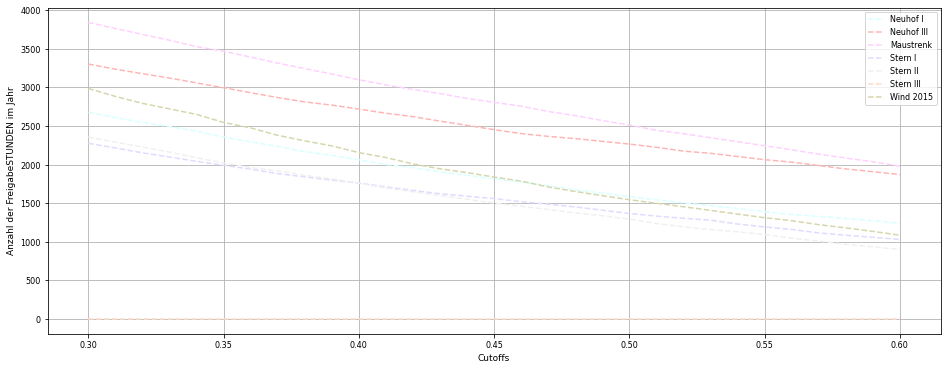

In [254]:
# Jahr 15 linienstyle='-.', Jahr 16 linienstyle='--', Jahr 17 linienstyle='-', Jahr 18 linienstyle=".",

NeuhofI15 = anzahlEA15[0:1].T
NeuhofIII15 = anzahlEA15[1:2].T
Maustrenk15 = anzahlEA15[2:3].T
SternI15 = anzahlEA15[3:4].T
SternII15 = anzahlEA15[4:5].T
SternIII15 = anzahlEA15[5:6].T
#Wind13 = anzahldf[0:1].T
Wind15 = anzahldf[1:2].T
Wind16 = anzahldf[2:3].T
Wind17 = anzahldf[6:7].T
Wind18 = anzahldf[7:8].T
Wind19 = anzahldf[8:9].T
#Wind20 = anzahldf[9:10].T

fig = plt.figure(figsize=(16,6))
ax = fig.gca()
plt.plot(NeuhofI15, color="#D9FFFF", linestyle="--")
plt.plot(NeuhofIII15, color="#FFB5B5", linestyle="--")
plt.plot(Maustrenk15, color="#FFD0FF", linestyle="--")
plt.plot(SternI15, color="#DDDDFF", linestyle="--")
plt.plot(SternII15, color="#F0F0F0", linestyle="--")
plt.plot(SternIII15, color="#FFDAC8", linestyle="--")
plt.plot(Wind15, color="#D6D6AD", linestyle="--")
plt.grid()
ax.set_yticks(np.arange(0, 4100, 500))
plt.xlabel('Cutoffs')
plt.ylabel('Anzahl der FreigabeSTUNDEN im Jahr')
plt.legend(["Neuhof I", "Neuhof III", "Maustrenk", "Stern I", "Stern II", "Stern III", "Wind 2015"])
plt.savefig("../data/Plots/curve_2015.png", dpi=300, bbox_inches="tight")


## 2016

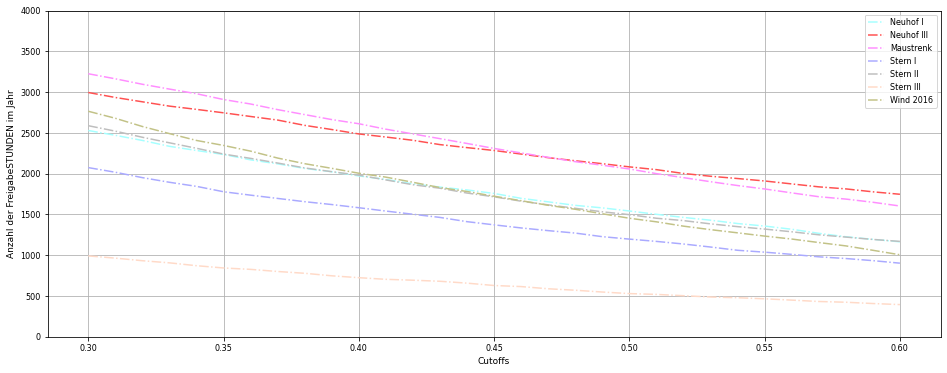

In [255]:
# Jahr 15 linienstyle='--', Jahr 16 linienstyle='-.', Jahr 17 linienstyle='-', Jahr 18 linienstyle=".",

NeuhofI16 = anzahlEA16[0:1].T
NeuhofIII16 = anzahlEA16[1:2].T
Maustrenk16 = anzahlEA16[2:3].T
SternI16 = anzahlEA16[3:4].T
SternII16 = anzahlEA16[4:5].T
SternIII16 = anzahlEA16[5:6].T
#Wind13 = anzahldf[0:1].T
Wind15 = anzahldf[1:2].T
Wind16 = anzahldf[2:3].T
Wind17 = anzahldf[6:7].T
Wind18 = anzahldf[7:8].T
Wind19 = anzahldf[8:9].T
#Wind20 = anzahldf[9:10].T

fig = plt.figure(figsize=(16,6))
ax = fig.gca()
plt.plot(NeuhofI16, color="#A6FFFF", linestyle="-.")
plt.plot(NeuhofIII16, color="#FF5151", linestyle="-.")
plt.plot(Maustrenk16, color="#FF8EFF", linestyle="-.")
plt.plot(SternI16, color="#AAAAFF", linestyle="-.")
plt.plot(SternII16, color="#BEBEBE", linestyle="-.")
plt.plot(SternIII16, color="#FFDAC8", linestyle="-.")
plt.plot(Wind16, color="#C2C287", linestyle="-.")
plt.grid()
ax.set_yticks(np.arange(0, 4100, 500))
plt.xlabel('Cutoffs')
plt.ylabel('Anzahl der FreigabeSTUNDEN im Jahr')
plt.legend(["Neuhof I", "Neuhof III", "Maustrenk", "Stern I", "Stern II", "Stern III", "Wind 2016"])
plt.savefig("../data/Plots/curve_2016.png", dpi=300, bbox_inches="tight")

## 2017

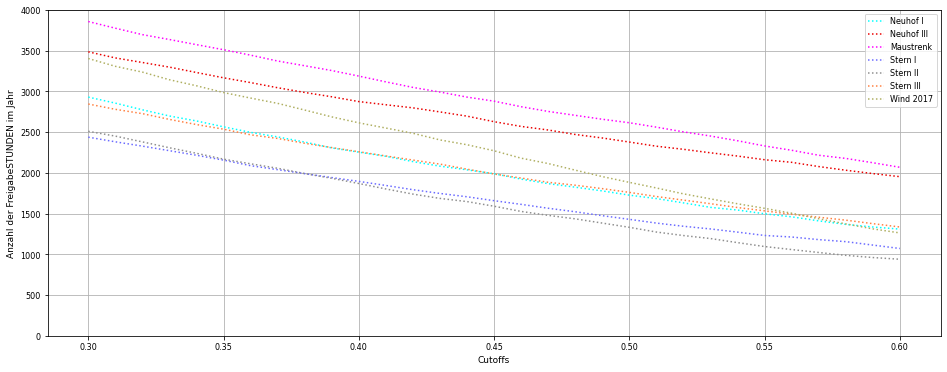

In [256]:
# Jahr 15 linienstyle='--', Jahr 16 linienstyle='-.', Jahr 17 linienstyle='.', Jahr 18 linienstyle="-",

NeuhofI17 = anzahlEA17[0:1].T
NeuhofIII17 = anzahlEA17[1:2].T
Maustrenk17 = anzahlEA17[2:3].T
SternI17 = anzahlEA17[3:4].T
SternII17 = anzahlEA17[4:5].T
SternIII17 = anzahlEA17[5:6].T
#Wind13 = anzahldf[0:1].T
Wind15 = anzahldf[1:2].T
Wind16 = anzahldf[2:3].T
Wind17 = anzahldf[6:7].T
Wind18 = anzahldf[7:8].T
Wind19 = anzahldf[8:9].T
#Wind20 = anzahldf[9:10].T

fig = plt.figure(figsize=(16,6))
ax = fig.gca()
plt.plot(NeuhofI17, color="#00FFFF", linestyle=":")
plt.plot(NeuhofIII17, color="#EA0000", linestyle=":")
plt.plot(Maustrenk17, color="#FF00FF", linestyle=":")
plt.plot(SternI17, color="#6A6AFF", linestyle=":")
plt.plot(SternII17, color="#8E8E8E", linestyle=":")
plt.plot(SternIII17, color="#FF8040", linestyle=":")
plt.plot(Wind17, color="#AFAF61", linestyle=":")
plt.grid()
ax.set_yticks(np.arange(0, 4100, 500))
plt.xlabel('Cutoffs')
plt.ylabel('Anzahl der FreigabeSTUNDEN im Jahr')
plt.legend(["Neuhof I", "Neuhof III", "Maustrenk", "Stern I", "Stern II", "Stern III", "Wind 2017"])
plt.savefig("../data/Plots/curve_2017.png", dpi=300, bbox_inches="tight")

## 2018

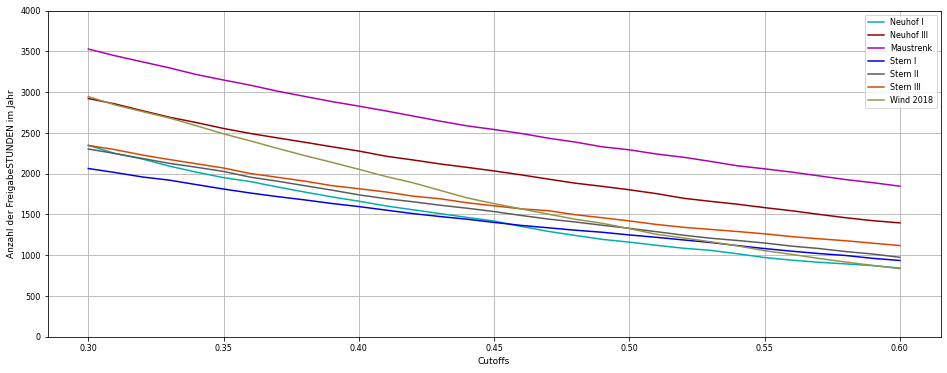

In [257]:
NeuhofI18 = anzahlEA18[0:1].T
NeuhofIII18 = anzahlEA18[1:2].T
Maustrenk18 = anzahlEA18[2:3].T
SternI18 = anzahlEA18[3:4].T
SternII18 = anzahlEA18[4:5].T
SternIII18 = anzahlEA18[5:6].T
#Wind13 = anzahldf[0:1].T
Wind15 = anzahldf[1:2].T
Wind16 = anzahldf[2:3].T
Wind17 = anzahldf[6:7].T
Wind18 = anzahldf[7:8].T
Wind19 = anzahldf[8:9].T
#Wind20 = anzahldf[9:10].T

fig = plt.figure(figsize=(16,6))
ax = fig.gca()
plt.plot(NeuhofI18, color="#00AEAE", linestyle="-")
plt.plot(NeuhofIII18, color="#930000", linestyle="-")
plt.plot(Maustrenk18, color="#AE00AE", linestyle="-")
plt.plot(SternI18, color="#0000E3", linestyle="-")
plt.plot(SternII18, color="#5B5B5B", linestyle="-")
plt.plot(SternIII18, color="#D94600", linestyle="-")
plt.plot(Wind18, color="#949449", linestyle="-")
plt.grid()
ax.set_yticks(np.arange(0, 4100, 500))
plt.xlabel('Cutoffs')
plt.ylabel('Anzahl der FreigabeSTUNDEN im Jahr')
plt.legend(["Neuhof I", "Neuhof III", "Maustrenk", "Stern I", "Stern II", "Stern III", "Wind 2018"])
plt.savefig("../data/Plots/curve_2018.png", dpi=300, bbox_inches="tight")

## 2019

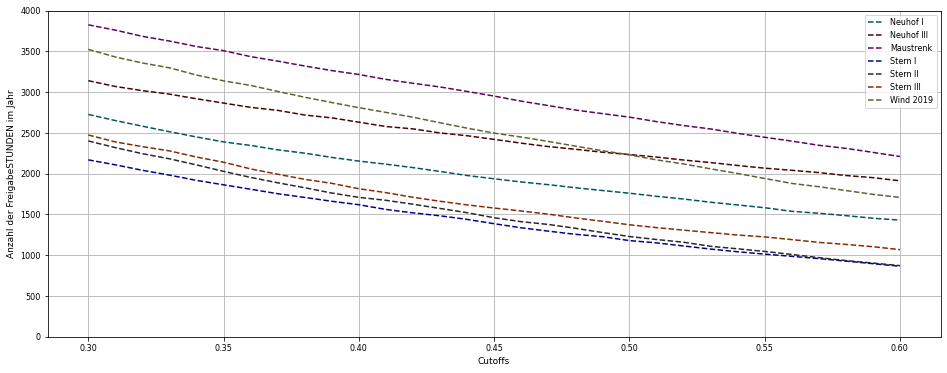

In [258]:
NeuhofI19 = anzahlEA19[0:1].T
NeuhofIII19 = anzahlEA19[1:2].T
Maustrenk19 = anzahlEA19[2:3].T
SternI19 = anzahlEA19[3:4].T
SternII19 = anzahlEA19[4:5].T
SternIII19 = anzahlEA19[5:6].T
#Wind13 = anzahldf[0:1].T
Wind15 = anzahldf[1:2].T
Wind16 = anzahldf[2:3].T
Wind17 = anzahldf[6:7].T
Wind18 = anzahldf[7:8].T
Wind19 = anzahldf[8:9].T
#Wind20 = anzahldf[9:10].T

fig = plt.figure(figsize=(16,6))
ax = fig.gca()
plt.plot(NeuhofI19, color="#005757", linestyle="--")
plt.plot(NeuhofIII19, color="#4D0000", linestyle="--")
plt.plot(Maustrenk19, color="#5E005E", linestyle="--")
plt.plot(SternI19, color="#000093", linestyle="--")
plt.plot(SternII19, color="#272727", linestyle="--")
plt.plot(SternIII19, color="#842B00", linestyle="--")
plt.plot(Wind19, color="#616130", linestyle="--")
plt.grid()
ax.set_yticks(np.arange(0, 4100, 500))
plt.xlabel('Cutoffs')
plt.ylabel('Anzahl der FreigabeSTUNDEN im Jahr')
plt.legend(["Neuhof I", "Neuhof III", "Maustrenk", "Stern I", "Stern II", "Stern III", "Wind 2019"])
plt.savefig("../data/Plots/curve_2019.png", dpi=300, bbox_inches="tight")

## All years

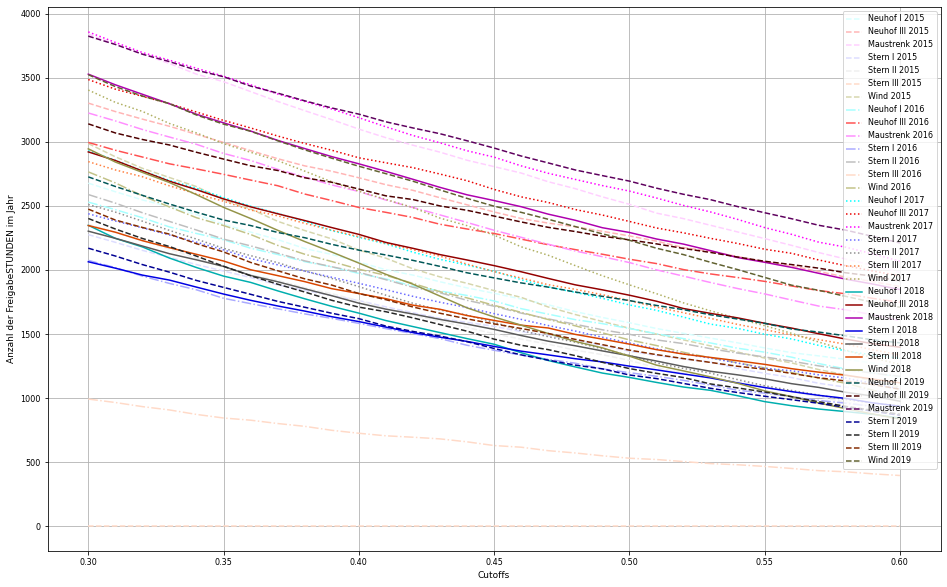

In [259]:
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
plt.plot(NeuhofI15, color="#D9FFFF", linestyle="--")
plt.plot(NeuhofIII15, color="#FFB5B5", linestyle="--")
plt.plot(Maustrenk15, color="#FFD0FF", linestyle="--")
plt.plot(SternI15, color="#DDDDFF", linestyle="--")
plt.plot(SternII15, color="#F0F0F0", linestyle="--")
plt.plot(SternIII15, color="#FFDAC8", linestyle="--")
plt.plot(Wind15, color="#D6D6AD", linestyle="--")

plt.plot(NeuhofI16, color="#A6FFFF", linestyle="-.")
plt.plot(NeuhofIII16, color="#FF5151", linestyle="-.")
plt.plot(Maustrenk16, color="#FF8EFF", linestyle="-.")
plt.plot(SternI16, color="#AAAAFF", linestyle="-.")
plt.plot(SternII16, color="#BEBEBE", linestyle="-.")
plt.plot(SternIII16, color="#FFDAC8", linestyle="-.")
plt.plot(Wind16, color="#C2C287", linestyle="-.")

plt.plot(NeuhofI17, color="#00FFFF", linestyle=":")
plt.plot(NeuhofIII17, color="#EA0000", linestyle=":")
plt.plot(Maustrenk17, color="#FF00FF", linestyle=":")
plt.plot(SternI17, color="#6A6AFF", linestyle=":")
plt.plot(SternII17, color="#8E8E8E", linestyle=":")
plt.plot(SternIII17, color="#FF8040", linestyle=":")
plt.plot(Wind17, color="#AFAF61", linestyle=":")

plt.plot(NeuhofI18, color="#00AEAE", linestyle="-")
plt.plot(NeuhofIII18, color="#930000", linestyle="-")
plt.plot(Maustrenk18, color="#AE00AE", linestyle="-")
plt.plot(SternI18, color="#0000E3", linestyle="-")
plt.plot(SternII18, color="#5B5B5B", linestyle="-")
plt.plot(SternIII18, color="#D94600", linestyle="-")
plt.plot(Wind18, color="#949449", linestyle="-")

plt.plot(NeuhofI19, color="#005757", linestyle="--")
plt.plot(NeuhofIII19, color="#4D0000", linestyle="--")
plt.plot(Maustrenk19, color="#5E005E", linestyle="--")
plt.plot(SternI19, color="#000093", linestyle="--")
plt.plot(SternII19, color="#272727", linestyle="--")
plt.plot(SternIII19, color="#842B00", linestyle="--")
plt.plot(Wind19, color="#616130", linestyle="--")

plt.grid()
ax.set_yticks(np.arange(0, 4100, 500))
plt.xlabel('Cutoffs')
plt.ylabel('Anzahl der FreigabeSTUNDEN im Jahr')
plt.legend(["Neuhof I 2015", "Neuhof III 2015", "Maustrenk 2015", "Stern I 2015", "Stern II 2015", "Stern III 2015", "Wind 2015", "Neuhof I 2016", "Neuhof III 2016", "Maustrenk 2016", "Stern I 2016", "Stern II 2016", "Stern III 2016", "Wind 2016", "Neuhof I 2017", "Neuhof III 2017", "Maustrenk 2017", "Stern I 2017", "Stern II 2017", "Stern III 2017", "Wind 2017", "Neuhof I 2018", "Neuhof III 2018", "Maustrenk 2018", "Stern I 2018", "Stern II 2018", "Stern III 2018", "Wind 2018", "Neuhof I 2019", "Neuhof III 2019", "Maustrenk 2019", "Stern I 2019", "Stern II 2019", "Stern III 2019", "Wind 2019"], loc="upper right")
plt.savefig("../data/Plots/curve_all_years.png", dpi=300, bbox_inches="tight")

In [260]:
df_sign_all = pd.DataFrame()
for c in df.columns:
        df_sign_all[c] = df[c].map(lambda x: -1 if x < cut else 1)
df_sign_all

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2019-01-01 00:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-01-01 01:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-01-01 02:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-01-01 03:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-01-01 04:00:00,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-12-31 20:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-12-31 21:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2019-12-31 22:00:00,1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1


In [261]:

df_step_all = pd.DataFrame()
df_not_all = pd.DataFrame()

for b in df_sign_all.columns:
    df_step_all[b] = df_sign_all[b].shift(1).ne(df_sign_all[b]).where(df_sign_all[b] == 1).cumsum()
    df_not_all[b] = df_sign_all[b].shift(1).ne(df_sign_all[b]).where(df_sign_all[b] == -1).cumsum()

df_step_all.iloc[0, :] = 0

df_step_all.fillna(0, inplace=True)
df_not_all.fillna(0, inplace=True)
desc_all = pd.DataFrame()
desc_all["Zeitraum mit Signal [h]"] = df_sign_all.where(df_sign_all > 0).sum()
desc_all["Nicht-Signal-Zeitraum [h]"] = 8760 - desc_all["Zeitraum mit Signal [h]"]
desc_all["Anzahl Signal-Perioden"] = df_step_all.max()
desc_all["Durchschnittliche Dauer Signal [h]"] = (desc_all["Zeitraum mit Signal [h]"] / desc_all["Anzahl Signal-Perioden"])
desc_all["Durchschnittliche Dauer Nicht-Signal [h]"] = desc_all["Nicht-Signal-Zeitraum [h]"] / desc_all["Anzahl Signal-Perioden"]

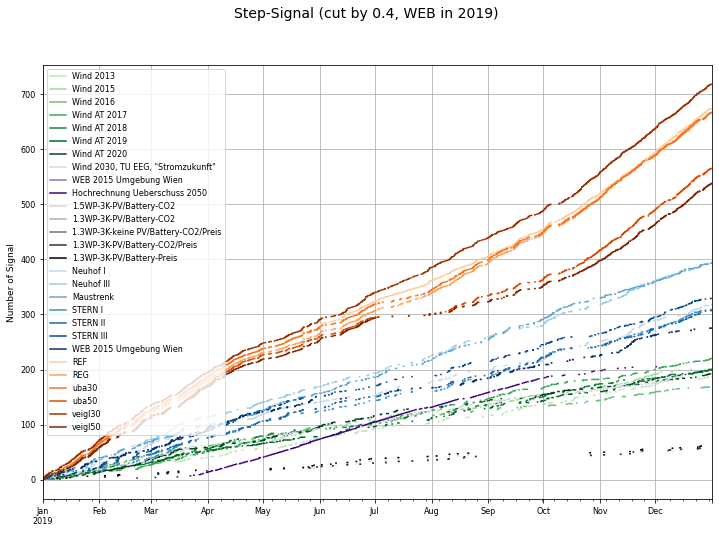

In [262]:
fig, ax = plt.subplots()

df_step_wind[df_step_wind.columns[0:7]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmapgreen, grid=True, ax=ax)
df_step_R[df_step_R.columns[0:3]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmappurple, grid=True, ax=ax)
df_step_Drexel[df_step_Drexel.columns[0:5]].plot(figsize=(12,8), cmap=cmapgrey, grid=True, ax=ax)
df_step_EA[df_step_EA.columns[0:7]].plot(figsize=(12,8), cmap=cmapblue, grid=True, ax=ax)
df_step_Max[df_step_Max.columns[0:6]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmaporange, grid=True, ax=ax)

fig.suptitle('Step-Signal (cut by {}, WEB in 2019)' .format(cut), fontsize=14)
fig.savefig("../data/Plots/cumplot_color_all_{}_2019.png" .format(cut), dpi=300, bbox_inches="tight")

In [263]:
df_EA = df_EA.filter(["Maustrenk", "Neuhof I", "Neuhof III", "STERN I", "STERN II", "STERN III"])
df_all = df.merge(df_EA, left_index=True, right_index=True)
df_all

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis,Maustrenk,Neuhof I,Neuhof III,STERN I,STERN II,STERN III
2019-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.000000,0.0,0.034815,0.313971,0.081336,0.636425,...,0.0,0.0,0.0,0.0,0.225000,0.002083,0.009175,0.000000,0.000000,0.000000
2019-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.000000,0.0,0.032298,0.285723,0.062099,0.662732,...,0.0,0.0,0.0,0.0,0.113143,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.000000,0.0,0.027026,0.318035,0.045562,0.668128,...,0.0,0.0,0.0,0.0,0.084000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.000000,0.0,0.027519,0.237349,0.037462,0.623272,...,0.0,0.0,0.0,0.0,0.061071,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.000000,0.0,0.025874,0.155524,0.053662,0.575042,...,0.0,0.0,0.0,0.0,0.045429,0.000000,0.003236,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.314554,0.396654,0.071725,0.204918,0.066582,0.0,0.158621,0.244374,0.673304,0.086003,...,0.0,0.0,0.0,0.0,0.956786,0.212083,0.161961,0.045937,0.049813,0.038062
2019-12-31 20:00:00,0.358647,0.336054,0.070473,0.215738,0.052745,0.0,0.218883,0.187702,0.606142,0.098482,...,0.0,0.0,0.0,0.0,0.964714,0.231667,0.261251,0.003000,0.005219,0.002063
2019-12-31 21:00:00,0.390740,0.275863,0.069313,0.225246,0.026788,0.0,0.236357,0.174650,0.659129,0.141990,...,0.0,0.0,0.0,0.0,0.885643,0.331667,0.307005,0.000000,0.000000,0.000000
2019-12-31 22:00:00,0.420899,0.192397,0.093453,0.235082,0.002470,0.0,0.266760,0.145799,0.683091,0.138954,...,0.0,0.0,0.0,0.0,0.764571,0.399792,0.596027,0.000000,0.000000,0.000000


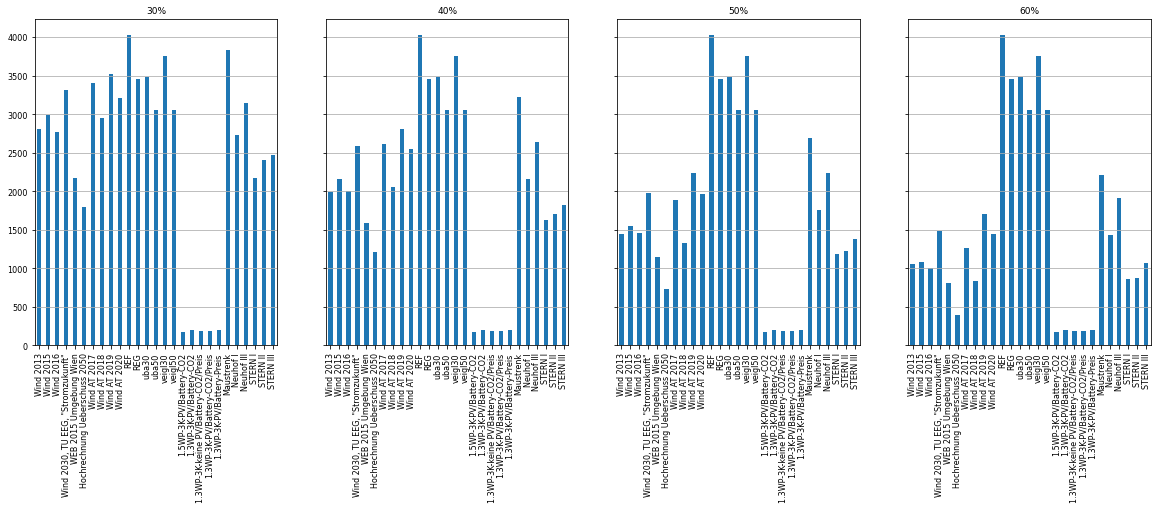

In [264]:
cutoffs = [0.3, 0.4, 0.5, 0.6]
anzahl_all = pd.DataFrame()
fig, ax = plt.subplots(1, len(cutoffs), sharey=True, figsize=(20, 6))
ax[0].title.set_text("30%")
ax[1].title.set_text("40%")
ax[2].title.set_text("50%")
ax[3].title.set_text("60%")
for i, x in enumerate(cutoffs):
    sig_all = df_all.where(df_all > x)
    sig_all.count().plot(kind="bar", ax=ax[i])
    anzahl_all[x] = sig_all.count()
    ax[i].grid(axis='y')
#fig.suptitle('Jahr 2018', fontsize=14)
fig.savefig("../data/Plots/Freigabe_all_2019.png", dpi=300, bbox_inches="tight")
#df_all

In [265]:
#cut = 0.4
df_sign_all = pd.DataFrame()
for c in df_all.columns:
    df_sign_all[c] = df_all[c].map(lambda x: -1 if x < cut else 1)
#df_sign_all

df_step_all = pd.DataFrame()
df_not_all = pd.DataFrame()

for b in df_sign_all.columns:
    df_step_all[b] = df_sign_all[b].shift(1).ne(df_sign_all[b]).where(df_sign_all[b] == 1).cumsum()
    df_not_all[b] = df_sign_all[b].shift(1).ne(df_sign_all[b]).where(df_sign_all[b] == -1).cumsum()

df_step_all.iloc[0, :] = 0
df_step_all

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis,Maustrenk,Neuhof I,Neuhof III,STERN I,STERN II,STERN III
2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,...,NaN,NaN,NaN,NaN,393.0,NaN,NaN,NaN,NaN,NaN
2019-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,...,NaN,NaN,NaN,NaN,393.0,NaN,NaN,NaN,NaN,NaN
2019-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,...,NaN,NaN,NaN,NaN,393.0,NaN,NaN,NaN,NaN,NaN
2019-12-31 22:00:00,187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,...,NaN,NaN,NaN,NaN,393.0,NaN,395.0,NaN,NaN,NaN


In [266]:
df_step_all.fillna(0, inplace=True)
df_not_all.fillna(0, inplace=True)
desc_all = pd.DataFrame()
desc_all["Zeitraum mit Signal [h]"] = df_sign_all.where(df_sign_all > 0).sum()
desc_all["Nicht-Signal-Zeitraum [h]"] = 8760 - desc_all["Zeitraum mit Signal [h]"]
desc_all["Anzahl Signal-Perioden"] = df_step_all.max()
desc_all["Durchschnittliche Dauer Signal [h]"] = (desc_all["Zeitraum mit Signal [h]"] / desc_all["Anzahl Signal-Perioden"])
desc_all["Durchschnittliche Dauer Nicht-Signal [h]"] = desc_all["Nicht-Signal-Zeitraum [h]"] / desc_all["Anzahl Signal-Perioden"]

desc_all

,Zeitraum mit Signal [h],Nicht-Signal-Zeitraum [h],Anzahl Signal-Perioden,Durchschnittliche Dauer Signal [h],Durchschnittliche Dauer Nicht-Signal [h]
Wind 2013,1994.0,6766.0,187.0,10.663102,36.181818
Wind 2015,2156.0,6604.0,201.0,10.726368,32.855721
Wind 2016,2006.0,6754.0,168.0,11.940476,40.202381
"Wind 2030, TU EEG, ""Stromzukunft""",2591.0,6169.0,188.0,13.781915,32.813830
WEB 2015 Umgebung Wien,1584.0,7176.0,275.0,5.760000,26.094545
Hochrechnung Ueberschuss 2050,1207.0,7553.0,205.0,5.887805,36.843902
Wind AT 2017,2615.0,6145.0,220.0,11.886364,27.931818
Wind AT 2018,2054.0,6706.0,200.0,10.270000,33.530000
Wind AT 2019,2810.0,5950.0,199.0,14.120603,29.899497
Wind AT 2020,2545.0,6215.0,192.0,13.255208,32.369792


In [267]:
len(df_all)

8760

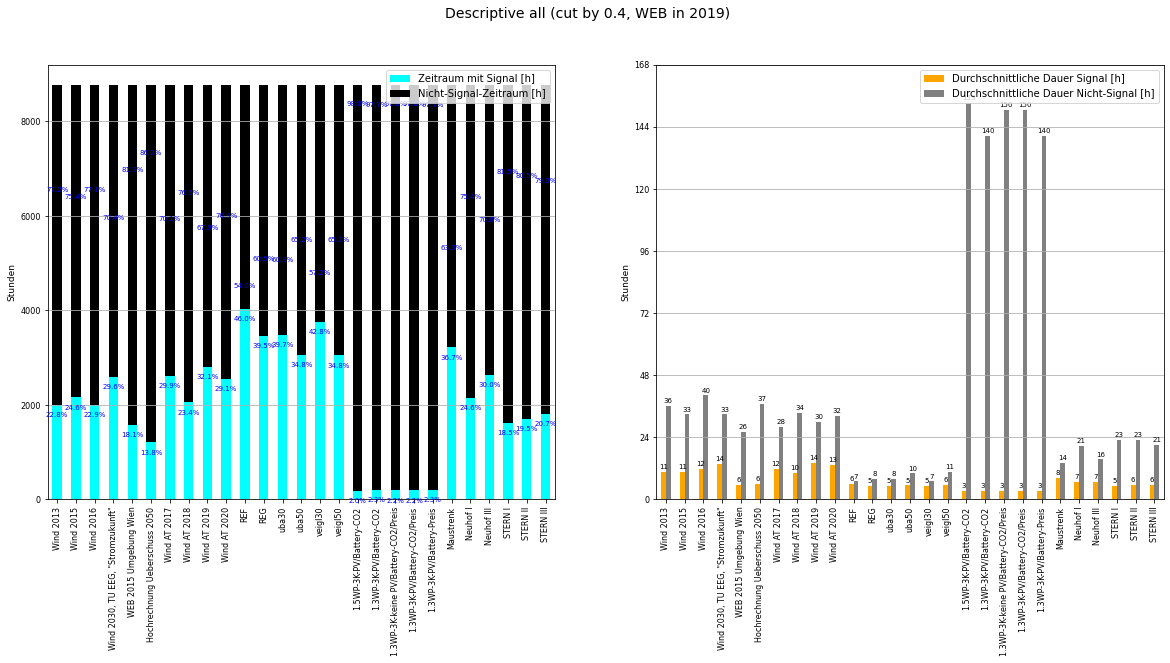

In [268]:
text_size = 10
fig, ax = plt.subplots(1,2, figsize=(20,8))
plt.rc('font', size=text_size)          # controls default text sizes
plt.rc('axes', titlesize=text_size)     # fontsize of the axes title
plt.rc('axes', labelsize=text_size)
desc_all[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
    .plot(kind="bar",color=["cyan", "black"], stacked=True, ax = ax[0])
ax[0].set_ylabel("Stunden")
#desc["Anzahl Signal-Perioden"].plot(kind="bar",color=["cyan"], stacked=True, ax = ax[1])
#ax[1].set_ylabel("Anzahl Signal-Perioden")
desc_all[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
    .plot(kind="bar",color=["orange", "grey"], stacked=False, ax = ax[1])
ax[1].set_ylabel("Stunden")
for p in ax[0].patches:
      ax[0].annotate("{:.1f}%" .format(p.get_height()*100/len(df_all)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=7, color='blue', xytext=(0, -10),
                     textcoords='offset points')
for p in ax[1].patches:
      ax[1].annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=7, color='black', xytext=(0, 5),
                     textcoords='offset points')
ax[0].grid(axis='y')
ax[1].grid(axis='y')
ax[1].yaxis.set_ticks(np.arange(0, 169, 24))
fig.suptitle('Descriptive all (cut by {}, WEB in 2019)' .format(cut), fontsize=14)
fig.savefig("../data/Plots/descriptive_all_{}_2019.png" .format(cut), dpi=300, bbox_inches='tight')

In [269]:
df_all_S = df_all.loc[(df_sign_all.index.month >= 4) & (df_sign_all.index.month < 10)]
df_all_W = df_all.loc[(df_sign_all.index.month <4) | (df_sign_all.index.month >= 10)]
df_all_S_sign = df_sign_all.loc[(df_sign_all.index.month >= 4) & (df_sign_all.index.month < 10)]
df_all_W_sign = df_sign_all.loc[(df_sign_all.index.month <4) | (df_sign_all.index.month >= 10)]
anzahl_all_S = pd.DataFrame()
anzahl_all_W = pd.DataFrame()
for i, x in enumerate(cutoffs):
    sig_all_S = df_all_S.where(df_all_S>x)
    anzahl_all_S[x] = sig_all_S.count()
    sig_all_W = df_all_W.where(df_all_W>x)
    anzahl_all_W[x] = sig_all_W.count()

In [270]:
df_all_S_step = pd.DataFrame()
df_all_S_not = pd.DataFrame()
df_all_W_step = pd.DataFrame()
df_all_W_not = pd.DataFrame()
for c in df_all_S_sign.columns:
    df_all_S_step[c] =  df_all_S_sign[c].shift(1).ne(df_all_S_sign[c]).where(df_all_S_sign[c]==1).cumsum()
    df_all_S_not[c] =  df_all_S_sign[c].shift(1).ne(df_all_S_sign[c]).where(df_all_S_sign[c]==-1).cumsum()
    df_all_W_step[c] =  df_all_W_sign[c].shift(1).ne(df_all_W_sign[c]).where(df_all_W_sign[c]==1).cumsum()
    df_all_W_not[c] =  df_all_W_sign[c].shift(1).ne(df_all_W_sign[c]).where(df_all_W_sign[c]==-1).cumsum()

In [271]:
len(df_all_S)

4392

In [272]:
len(df_all_W)

4368

In [273]:
desc_all_S = pd.DataFrame()
desc_all_S["Zeitraum mit Signal [h]"] = anzahl_all_S[cut]
desc_all_S["Nicht-Signal-Zeitraum [h]"] = len(df_all_S) - anzahl_all_S[cut]
desc_all_S["Anzahl Signal-Perioden"] = df_all_S_step.max()
desc_all_S["Durchschnittliche Dauer Signal [h]"] = (desc_all_S["Zeitraum mit Signal [h]"]/desc_all_S["Anzahl Signal-Perioden"])
desc_all_S["Durchschnittliche Dauer Nicht-Signal [h]"] = desc_all_S["Nicht-Signal-Zeitraum [h]"]/desc_all_S["Anzahl Signal-Perioden"]

desc_all_W = pd.DataFrame()
desc_all_W["Zeitraum mit Signal [h]"] = anzahl_all_W[cut]
desc_all_W["Nicht-Signal-Zeitraum [h]"] = len(df_all_W) - anzahl_all_W[cut]
desc_all_W["Anzahl Signal-Perioden"] = df_all_W_step.max()
desc_all_W["Durchschnittliche Dauer Signal [h]"] = (desc_all_W["Zeitraum mit Signal [h]"]/desc_all_W["Anzahl Signal-Perioden"])
desc_all_W["Durchschnittliche Dauer Nicht-Signal [h]"] = desc_all_W["Nicht-Signal-Zeitraum [h]"]/desc_all_W["Anzahl Signal-Perioden"]

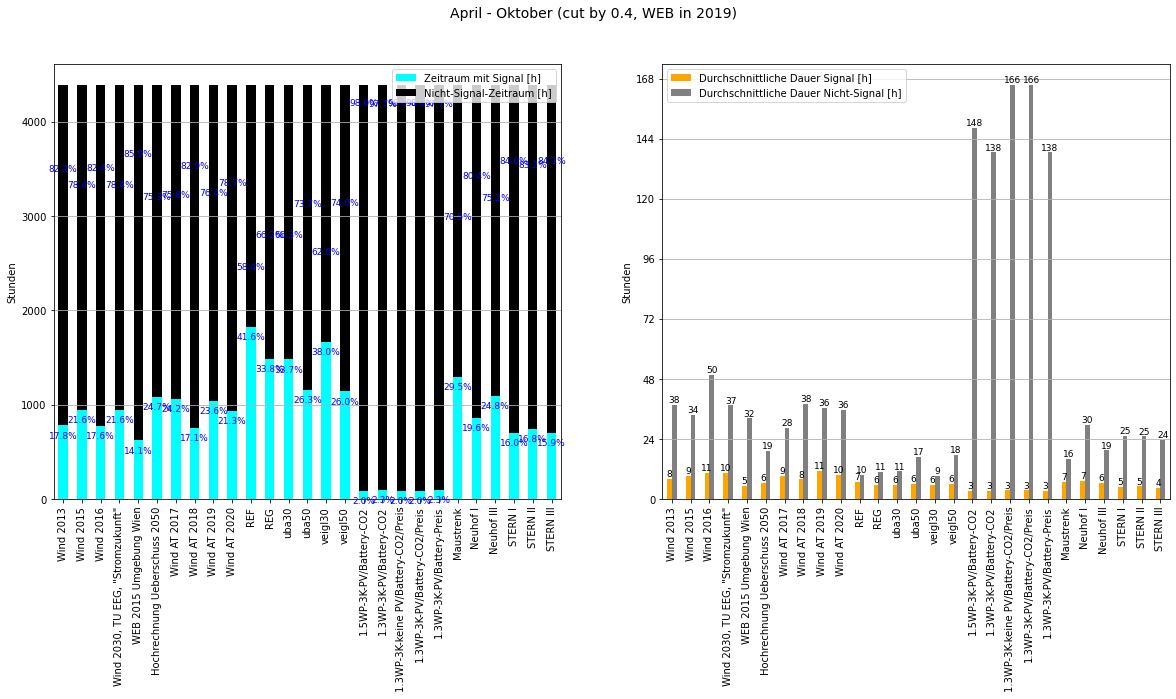

In [274]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(20,8))

plt.rc('font', size=text_size)          # controls default text sizes
plt.rc('axes', titlesize=text_size)     # fontsize of the axes title
plt.rc('axes', labelsize=text_size)

ax[0].set_ylabel("Stunden")
ax[1].set_ylabel("Stunden")
#ax[1].set_ylim(0,300)
desc_all_S[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
   .plot(kind="bar", color=["cyan", "black"], stacked=True, ax = ax[0])
desc_all_S[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
   .plot(kind="bar", color=["orange", "grey"], stacked=False, ax = ax[1])
ax[0].grid(axis='y')
ax[1].grid(axis='y')

for p in ax[0].patches:
      ax[0].annotate("{:.1f}%" .format(p.get_height()*100/len(df_all_S)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='blue', xytext=(0, -10),
                     textcoords='offset points')
for p in ax[1].patches:
      ax[1].annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')
ax[1].yaxis.set_ticks(np.arange(0, 169, 24))
fig.suptitle('April - Oktober (cut by {}, WEB in 2019)' .format(cut), fontsize=14)
fig.savefig("../data/Plots/desc_all_sommers_{}_2019.png" .format(cut), dpi=400, bbox_inches="tight")


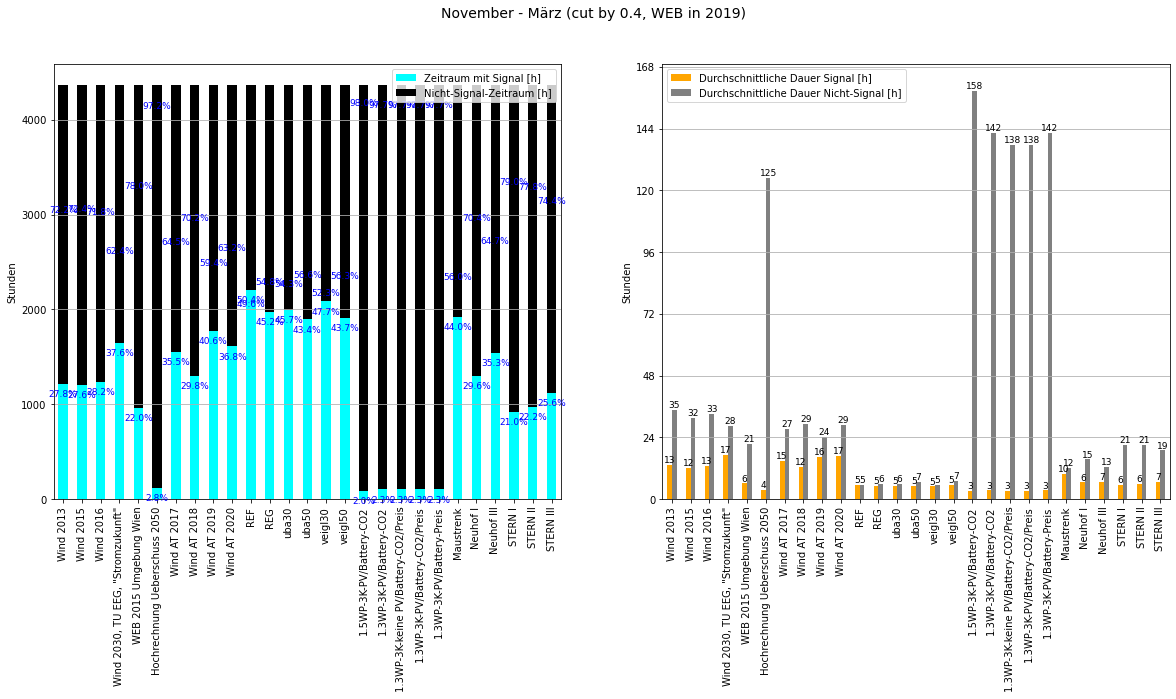

In [275]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(20,8))

ax[0].set_ylabel("Stunden")
ax[1].set_ylabel("Stunden")
#ax[1].set_ylim(0,300)
desc_all_W[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
   .plot(kind="bar", color=["cyan", "black"], stacked=True, ax = ax[0])
desc_all_W[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
   .plot(kind="bar", color=["orange", "grey"], stacked=False, ax = ax[1])
ax[0].grid(axis='y')
ax[1].grid(axis='y')

for p in ax[0].patches:
      ax[0].annotate("{:.1f}%" .format(p.get_height()*100/len(df_all_W)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='blue', xytext=(0, -10),
                     textcoords='offset points')
for p in ax[1].patches:
      ax[1].annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')
ax[1].set_ylim(0,169)
ax[1].yaxis.set_ticks(np.arange(0, 169, 24))
fig.suptitle('November - März (cut by {}, WEB in 2019)' .format(cut), fontsize=14)
fig.savefig("../data/Plots/desc_all_winters_{}_2019.png" .format(cut), dpi=400, bbox_inches="tight")

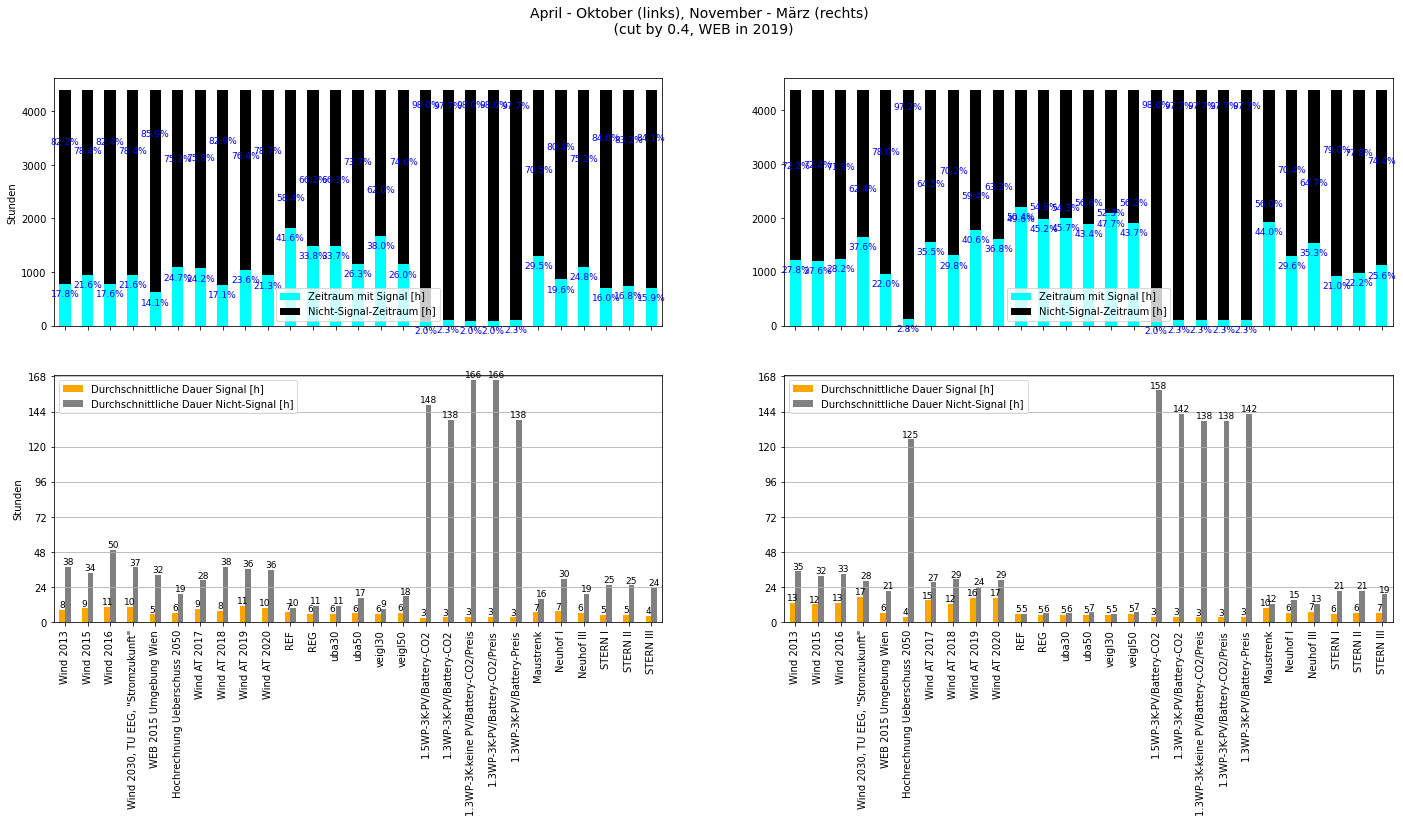

In [276]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(24,10))
for i in range(2):
    ax[i, 0].set_ylabel("Stunden")
    ax[1, i].set_ylim(0,169)
    ax[1, i].yaxis.set_ticks(np.arange(0, 169, 24))
desc_all_S[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
   .plot(kind="bar", color=["cyan", "black"], stacked=True, ax = ax[0, 0])
desc_all_S[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
   .plot(kind="bar", color=["orange", "grey"], stacked=False, ax = ax[1, 0])


desc_all_W[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
   .plot(kind="bar", color=["cyan", "black"], stacked=True, ax = ax[0, 1])
desc_all_W[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
   .plot(kind="bar", color=["orange", "grey"], stacked=False, ax = ax[1, 1])

plt.setp(ax[1, 0], ylim=ax[1,1].get_ylim())

for p in ax[0, 0].patches:
      ax[0, 0].annotate("{:.1f}%" .format(p.get_height()*100/len(df_all_S)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='blue', xytext=(0, -10),
                     textcoords='offset points')
for r in ax[0, 1].patches:
      ax[0, 1].annotate("{:.1f}%" .format(r.get_height()*100/len(df_all_W)), (r.get_x() + r.get_width() / 2., r.get_height()), ha='center', va='center', fontsize=9, color='blue', xytext=(0, -10),
                     textcoords='offset points')
for s in ax[1,1].patches:
      ax[1,1].annotate("{:.0f}" .format(s.get_height()), (s.get_x() + s.get_width() / 2., s.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')
for t in ax[1,0].patches:
      ax[1,0].annotate("{:.0f}" .format(t.get_height()), (t.get_x() + t.get_width() / 2., t.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')

for i in range(2):
#    ax[i, 0].grid(axis='y')
    ax[1, i].grid(axis='y')

fig.suptitle('April - Oktober (links), November - März (rechts) \n (cut by {}, WEB in 2019)' .format(cut), fontsize=14)
fig.savefig("../data/Plots/desc_all_sommer_winter_vergleich_{}_2019.png" .format(cut), dpi=400, bbox_inches="tight")